**Estelle Doriot**

_NSI Tale_

---

# Exercices: Programmation orientée objet

---


### Exercice n° 1: (Compte bancaire)

Écrire une classe `CompteBancaire`.

1. Les objets sont initialisés avec le nom du titulaire et le solde. L’argument solde doit être facultatif et avoir une valeur prédéfinie zéro.

2. Ajouter deux méthodes `depot(self, somme)` et `retrait(self, somme)` pour changer le solde. La méthode `retrait` doit effectuer le retrait si le solde est suffisant (supérieur au montant qu'on souhaite retirer). Sinon elle doit afficher un message et ne pas effectuer le débit.

3. Ajouter une méthode `get_solde(self)` qui montre le solde courant.

4. Ajouter une méthode `est_positif(self)` qui renvoie `True` si le solde du compte est positif.

5. Ecrire une méthode `__str__` qui permettra l'affichage avec `print`.

6. Compléter le script en créant un compte, verser de l'argent puis effectuer un débit.


In [1]:
class CompteBancaire:
    def __init__(self, titulaire: str, solde: float = 0) -> None:
        self.titulaire = titulaire
        self.solde = solde

    def depot(self, somme: float) -> None:
        assert somme > 0
        self.solde += somme

    def retrait(self, somme: float) -> None:
        assert somme > 0
        if somme > self.solde:
            print("Vous n'avez pas assez d'argent")
            return
        self.solde -= somme

    def get_solde(self) -> float:
        return self.solde

    def est_positif(self) -> bool:
        return self.solde > 0

    def __str__(self) -> str:
        return f"Compte de {self.titulaire} - solde : {self.solde}"


compte_1 = CompteBancaire("Jean Dupont")
compte_1.depot(5000)
compte_1.retrait(200)
print(compte_1)

Compte de Jean Dupont - solde : 4800


### Exercice n°2

On suppose écrites les classes Piece et Appartement, dont on vous donne les en-têtes de méthodes :

```python
class Piece:
    def __init__(self, nom: str, surface: float):
        self.nom = nom
        self.surface = surface

    # Accesseurs: retournent les attributs d'un objet de cette classe
    def get_surface(self) -> float:
        return self.surface

    def get_nom(self) -> str:
        return self.nom

    # Mutateur
    def set_surface(self, s: float):
        ...

class Appartement:
    def __init__(self, nom: str):
        # L'objet est une liste de pièces (objets issus de la classe Piece)
        self.liste_pieces = []
        self.nom = nom

    def get_nom(self) -> str:
        # Accesseurs:
        return self.nom

    # pour ajouter une pièce de classe Piece
    def ajouter(self, piece: Piece):
        ...

    # pour avoir le nombre de pièces de l'appartement
    def nb_pieces(self):
        ...

    # retourne la surface totale de l'appartement (un float)
    def surface_totale(self):
        ...

    # retourne la liste des pièces avec les surfaces
    def get_liste_pieces(self): # sous forme d'une liste de tuples
        ...
```

1. Écrire les méthodes constructeurs des deux classes.
2. Finaliser la classe Piece. Écrire les méthodes accesseurs et mutateurs de la classe Piece.
3. Finaliser la classe Appartement.

(a) Écrire la méthode qui permet d’ajouter une pièce |ajouter(self, piece)| de la liste de pièces présentes dans l’appartement.

(b) Écrire la méthode qui permet de retourner le nombre de pièces |nb_pieces(self)| présentes dans l’appartement.

(c) Écrire la méthode |surface_totale(self)|, qui renvoie la surface totale de l’appartement.

(d) Écrire la méthode |get_liste_pieces(self)|, qui renvoie la liste des pièces de l’appartement.


In [43]:
class Piece:
    def __init__(self, nom: str, surface: float) -> None:
        self.nom = nom
        self.surface = surface

    # Accesseurs: retournent les attributs d'un objet de cette classe
    def get_surface(self) -> float:
        return self.surface

    def get_nom(self) -> str:
        return self.nom

    # Mutateur
    def set_surface(self, s: float) -> None:
        assert s > 0
        self.surface = s


class Appartement:
    def __init__(self, nom: str) -> None:
        self.liste_pieces = []
        self.nom = nom

    # Accesseurs:
    def get_nom(self) -> str:
        return self.nom

    # pour ajouter une pièce de classe Piece
    def ajouter(self, piece: Piece) -> None:
        self.liste_pieces.append(piece)

    # pour avoir le nombre de pièces de l'appartement
    def nb_pieces(self) -> int:
        return len(self.liste_pieces)

    # retourne la surface totale de l'appartement (un float)
    def surface_totale(self) -> float:
        return sum(piece.get_surface() for piece in self.liste_pieces)

    # retourne la liste des pièces avec les surfaces
    def get_liste_pieces(
        self,
    ) -> list[tuple[str, float]]:
        return [(piece.get_nom(), piece.get_surface()) for piece in self.liste_pieces]

4. créer une pièce « chambre1 », de surface 20 m2 et une pièce « chambre2 », de surface 15 m2.


In [44]:
chambre1 = Piece("chambre1", 20)
chambre2 = Piece("chambre2", 15)

5. créer une pièce « séjour », de surface 25 m2 et une pièce « sdb », de surface 10 m2.


In [45]:
sejour = Piece("séjour", 25)
sdb = Piece("sdb", 10)

6. créer une pièce « cuisine », de surface 12 m2.


In [39]:
cuisine = Piece("cuisine", 12)

7. créer un appartement « appart205 » qui contiendra toutes les pièces créées.


In [46]:
appart205 = Appartement("appart205")
appart205.ajouter(chambre1)
appart205.ajouter(chambre2)
appart205.ajouter(sejour)
appart205.ajouter(sdb)
appart205.ajouter(cuisine)

8. afficher la surface totale de l’appartement créé.


In [47]:
print(appart205.surface_totale())

82


9. afficher la liste des pièces et surfaces de l’appartement créé.


In [48]:
print(appart205.get_liste_pieces())

[('chambre1', 20), ('chambre2', 15), ('séjour', 25), ('sdb', 10), ('cuisine', 12)]


### Exercice n°3

Dans un jeu de stratégie au tour par tour, les joueurs dirigent des équipes de guerriers qui vont se combattre. Un guerrier est connu par son nom et est caractérisé par :

- `nom` : le nom du personnage
- `pts_vie` : ses points de vie, qu'il perd au fur et à mesure des combats;
- `force` : sa force, qui détermine la puissance des coups qu'il porte à ses adversaires;
- `adresse` : son adresse, qui détermine son habileté à atteindre son adversaire, (valeur entre 0 et 100);
- `nb_coups` : le nombre de coups qu'il peut porter lors d'une attaque;
- `armure` : son armure, qui le protège et atténue les coups qu'il reçoit, (valeur entre 0 et 100).

Nous modéliserons un guerrier en python par une classe `Personnage` dont les attributs seront les caractéristiques citées ci-dessus.

1. Définir la classe `Personnage`.


In [ ]:
class Personnage:
    def __init__(
        self,
        nom: str,
        pts_vie: int,
        force: int,
        adresse: int,
        nb_coups: int,
        armure: int,
    ) -> None:
        self.nom = nom
        self.pts_vie = pts_vie
        self.force = force
        self.adresse = adresse
        self.nb_coups = nb_coups
        self.armure = armure

On pourra définir les personnages suivants:

```python
perso1 = Personnage(
    nom="Helmut", pts_vie=100, force=6, adresse=75, nb_coups=3, armure=30
)
perso4 = Personnage(
    nom="Boris", pts_vie=100, force=3, adresse=30, nb_coups=3, armure=15
)
```

2. Un personnage est vivant si ses points de vie sont strictement positifs. Définir la méthode `est_vivant()` qui est un prédicat qui teste si un guerrier donné en paramètre est vivant ou non.


In [ ]:
class Personnage:
    def __init__(
        self,
        nom: str,
        pts_vie: int,
        force: int,
        adresse: int,
        nb_coups: int,
        armure: int,
    ) -> None:
        self.nom = nom
        self.pts_vie = pts_vie
        self.force = force
        self.adresse = adresse
        self.nb_coups = nb_coups
        self.armure = armure

    def est_vivant(self) -> bool:
        return self.pts_vie > 0

3. Il peut être utile de définir une méthode qui résume l'état du personnage, en affichant ses différentes caractéristiques. Définir cette méthode que l'on nommera `etat()`. Par exemple, on obtiendra l'affichage:

```
>>> perso1.etat()
Helmut est vivant avec 100 points de vie(ou mort). Il possède les caractéristiques suivantes :
- force : 6
- adresse : 75
- nombre de coups par attaque : 3
- armure d'efficacité : 30
```


In [1]:
class Personnage:
    def __init__(
        self,
        nom: str,
        pts_vie: int,
        force: int,
        adresse: int,
        nb_coups: int,
        armure: int,
    ) -> None:
        self.nom = nom
        self.pts_vie = pts_vie
        self.force = force
        self.adresse = adresse
        self.nb_coups = nb_coups
        self.armure = armure

    def est_vivant(self) -> bool:
        return self.pts_vie > 0

    def etat(self) -> None:
        print(
            f"{self.nom} est " + f"vivant avec {self.pts_vie} points de vie. "
            if self.est_vivant()
            else "mort. " + "Il possède les caractéristiques suivantes :"
        )
        print(f"- force : {self.force}")
        print(f"- adresse : {self.adresse}")
        print(f"- nombre de coups par attaque : {self.nb_coups}")
        print(f"- armure d'efficacité : {self.armure}")


perso1 = Personnage(
    nom="Helmut", pts_vie=100, force=6, adresse=75, nb_coups=3, armure=30
)
perso1.etat()

Helmut est vivant avec 100 points de vie. 
- force : 6
- adresse : 75
- nombre de coups par attaque : 3
- armure d'efficacité : 30


4. Lorsqu'un guerrier donne un coup à un adversaire, la valeur du coup est celui de sa force. Néanmoins, il faut d'abord déterminer si l'adversaire sera atteint. Cette possibilité est tirée au hasard, avec une probabilité de réussite indiquée par l'adresse qui est un pourcentage de chance de réussir. Un guerrier mort, ou un guerrier qui n'atteint pas son adversaire, porte un coup d'une force nulle.

Proposez la méthode `donne_un_coup()` qui retourne la valeur du coup porté par un guerrier donné.


In [3]:
from random import randint


class Personnage:
    def __init__(
        self,
        nom: str,
        pts_vie: int,
        force: int,
        adresse: int,
        nb_coups: int,
        armure: int,
    ) -> None:
        self.nom = nom
        self.pts_vie = pts_vie
        self.force = force
        self.adresse = adresse
        self.nb_coups = nb_coups
        self.armure = armure

    def est_vivant(self) -> bool:
        return self.pts_vie > 0

    def etat(self) -> None:
        print(
            f"{self.nom} est " + f"vivant avec {self.pts_vie} points de vie. "
            if self.est_vivant()
            else "mort. " + "Il possède les caractéristiques suivantes :"
        )
        print(f"- force : {self.force}")
        print(f"- adresse : {self.adresse}")
        print(f"- nombre de coups par attaque : {self.nb_coups}")
        print(f"- armure d'efficacité : {self.armure}")

    def donne_un_coup(self) -> int:
        if not self.est_vivant() or randint(0, 100) > self.adresse:
            return 0
        return self.force


perso1 = Personnage(
    nom="Helmut", pts_vie=100, force=6, adresse=75, nb_coups=3, armure=30
)
perso1.etat()
print(perso1.donne_un_coup())
print(perso1.donne_un_coup())
print(perso1.donne_un_coup())
print(perso1.donne_un_coup())

Helmut est vivant avec 100 points de vie. 
- force : 6
- adresse : 75
- nombre de coups par attaque : 3
- armure d'efficacité : 30
6
6
0
6


5. Lorsqu'un guerrier reçoit un coup, son armure le protège. La valeur de son armure est appliquée comme un pourcentage de coefficient de protection sur la force du coup reçu. Ainsi, un guerrier qui reçoit un coup de 5 points, mais qui a une armure avec un coefficient de protection de 20%, voit diminuer ses points de vie de 4 points seulement.

Proposez la méthode `prend_un_coup(force)` qui, pour un guerrier et une force de coups donnés, diminue les points de vie du guerrier. Un guerrier ne peut jamais avoir des points de vie négatifs.


In [8]:
from random import randint


class Personnage:
    def __init__(
        self,
        nom: str,
        pts_vie: int,
        force: int,
        adresse: int,
        nb_coups: int,
        armure: int,
    ) -> None:
        self.nom = nom
        self.pts_vie = pts_vie
        self.force = force
        self.adresse = adresse
        self.nb_coups = nb_coups
        self.armure = armure

    def est_vivant(self) -> bool:
        return self.pts_vie > 0

    def etat(self) -> None:
        print(
            f"{self.nom} est " + f"vivant avec {self.pts_vie} points de vie. "
            if self.est_vivant()
            else "mort. " + "Il possède les caractéristiques suivantes :"
        )
        print(f"- force : {self.force}")
        print(f"- adresse : {self.adresse}")
        print(f"- nombre de coups par attaque : {self.nb_coups}")
        print(f"- armure d'efficacité : {self.armure}")

    def donne_un_coup(self) -> int:
        if not self.est_vivant() or randint(0, 100) > self.adresse:
            return 0
        return self.force

    def prend_un_coup(self, force: int) -> None:
        degats = round(force * (100 - self.armure) / 100)
        self.pts_vie = max(0, self.pts_vie - degats)


perso1 = Personnage(
    nom="Helmut", pts_vie=100, force=6, adresse=75, nb_coups=3, armure=30
)
perso1.etat()
print(perso1.donne_un_coup())
perso1.prend_un_coup(8)
perso1.etat()

Helmut est vivant avec 100 points de vie. 
- force : 6
- adresse : 75
- nombre de coups par attaque : 3
- armure d'efficacité : 30
6
Helmut est vivant avec 94 points de vie. 
- force : 6
- adresse : 75
- nombre de coups par attaque : 3
- armure d'efficacité : 30


6. Lors d'une attaque d'un guerrier sur un autre, le premier guerrier porte ses `nbCoups` au deuxième, puis, si le deuxième est encore vivant, c'est à son tour de donner des coups au premier.

Proposez la fonction `attaque()` qui gère l'attaque de deux guerriers donnés. Ici, c'est une fonction, donc c'est en dehors de la classe.


In [13]:
def attaque(guerrier1: Personnage, guerrier2: Personnage) -> None:
    for _ in range(guerrier1.nb_coups):
        guerrier2.prend_un_coup(guerrier1.donne_un_coup())
    if not guerrier2.est_vivant():
        return
    for _ in range(guerrier2.nb_coups):
        guerrier1.prend_un_coup(guerrier2.donne_un_coup())


perso1 = Personnage(
    nom="Helmut", pts_vie=100, force=6, adresse=75, nb_coups=3, armure=30
)
perso4 = Personnage(
    nom="Boris", pts_vie=100, force=3, adresse=30, nb_coups=3, armure=15
)

attaque(perso1, perso4)
perso1.etat()
perso4.etat()

Helmut est vivant avec 98 points de vie. 
- force : 6
- adresse : 75
- nombre de coups par attaque : 3
- armure d'efficacité : 30
Boris est vivant avec 85 points de vie. 
- force : 3
- adresse : 30
- nombre de coups par attaque : 3
- armure d'efficacité : 15


7. Imaginez maintenant, un combat qui est une suite d'attaques entre deux guerriers. Le premier à attaquer est celui avec la plus grande adresse. Le combat se termine lorsqu'un des deux personnages est mort. Un message est alors affiché, par exemple:

```
>>> combat(perso1, perso4)
Dans le combat Helmut contre Boris, Helmut a gagné !!
```

Proposez une fonction `combat()` qui gère le combat entre deux personnages.


In [15]:
def combat(guerrier1: Personnage, guerrier2: Personnage) -> None:
    if guerrier1.adresse >= guerrier2.adresse:
        premier, deuxieme = guerrier1, guerrier2
    else:
        premier, deuxieme = guerrier2, guerrier1
    while premier.est_vivant() and deuxieme.est_vivant():
        attaque(premier, deuxieme)
    vainqueur = premier if premier.est_vivant() else deuxieme
    print(
        f"Dans le combat {guerrier1.nom} contre {guerrier2.nom}, {vainqueur.nom} a gagné !!"
    )


perso1 = Personnage(
    nom="Helmut", pts_vie=100, force=6, adresse=75, nb_coups=3, armure=30
)
perso4 = Personnage(
    nom="Boris", pts_vie=100, force=3, adresse=30, nb_coups=3, armure=15
)
combat(perso1, perso4)

Dans le combat Helmut contre Boris, Helmut a gagné !!


### Exercice n° 4: (Heures)

La classe `Heure` permet de représenter une heure de la journée. Les objets possèdent 3 attributs : `h`, `m` et `s` qui correspondent aux heures, minutes et secondes.

Ainsi, l’heure `14:26:17` sera représentée par `Heure(14, 26, 17)`. Les heures doivent donc aller de `00:00:00` à `23:59:59`.

1. Compléter le constructeur de la classe `Heure`. Il prend comme paramètres, en
   plus de `self`, 3 entiers positifs `h`, `m` et `s`. Au final, il faut avoir 0 ≤ self.h < 24, 0 ≤ self.m < 60 et 0 ≤ self.s < 60. Si les paramètres ne vérifient pas ces conditions, il faut adapter les valeurs. Par exemple 12:00:70 correspond à 12:01:10, ou encore 23:62:00 deviendra 00:02:00.


In [1]:
class Heure:
    def __init__(self, h: int, m: int, s: int) -> None:
        self.s = s % 60
        self.m = (m + s // 60) % 60
        self.h = (h + (m + s // 60) // 60) % 24

2. Compléter la méthode `__repr__(self)` qui renvoie le texte permettant de re-créer l’objet `Heure(h, m, s)`.


In [3]:
class Heure:
    def __init__(self, h: int, m: int, s: int) -> None:
        self.s = s % 60
        self.m = (m + s // 60) % 60
        self.h = (h + (m + s // 60) // 60) % 24

    def __repr__(self) -> str:
        return f"Heure({self.h}, {self.m}, {self.s})"


print(Heure(12, 7, 15))
print(Heure(23, 59, 80))
print(Heure(23, 62, 00))

Heure(12, 7, 15)
Heure(0, 0, 20)
Heure(0, 2, 0)


3. Compléter la méthode `__str__(self)` qui renvoie un texte correspondant à
   l’heure sous le format `'Xh Ym Zs'`, où X, Y et Z sont les valeurs des différents attributs de l'instance.


In [4]:
class Heure:
    def __init__(self, h: int, m: int, s: int) -> None:
        self.s = s % 60
        self.m = (m + s // 60) % 60
        self.h = (h + (m + s // 60) // 60) % 24

    def __repr__(self) -> str:
        return f"Heure({self.h}, {self.m}, {self.s})"

    def __str__(self) -> str:
        return f"{self.h}h {self.m}m {self.s}s"


print(Heure(12, 7, 15))
print(Heure(23, 59, 80))

12h 7m 15s
0h 0m 20s


4. Compléter la méthode `avance(self, s)` qui avance l’heure de l’objet de `s`
   secondes. Là encore, il faudra s’assurer que les valeurs stockées sont conformes.


In [5]:
class Heure:
    def __init__(self, h: int, m: int, s: int) -> None:
        self.s = s % 60
        self.m = (m + s // 60) % 60
        self.h = (h + (m + s // 60) // 60) % 24

    def __repr__(self) -> str:
        return f"Heure({self.h}, {self.m}, {self.s})"

    def __str__(self) -> str:
        return f"{self.h}h {self.m}m {self.s}s"

    def avance(self, s: int) -> None:
        self.s = (self.s + s) % 60
        self.m = (self.m + (self.s + s) // 60) % 60
        self.h = (self.h + (self.m + (self.s + s) // 60) // 60) % 24


h = Heure(12, 7, 15)
h.avance(80)
print(h)

12h 8m 35s


5. Nous allons compléter la classe `Heure2` qui ne stocke que les secondes écoulées depuis 00:00:00. Compléter le constructeur `__init__(self, h, m, s)`, qui convertit l’heure donnée en secondes, qui peuvent donc dépasser 60, mais pas 86 400, le nombre de secondes dans une journée.


In [7]:
class Heure2:
    def __init__(self, h: int, m: int, s: int) -> None:
        self.s = (h * 3600 + m * 60 + s) % 86400


h = Heure2(20, 17, 35)
print(h.s)

73055


6. Compléter la méthode `_conversion(self)` qui renvoie un triplet `(h, m, s)`
   qui correspond à l’heure stockée.


In [9]:
class Heure2:
    def __init__(self, h: int, m: int, s: int) -> None:
        self.s = (h * 3600 + m * 60 + s) % 86400

    def _conversion(self) -> tuple[int, int, int]:
        return (self.s // 3600, (self.s % 3600) // 60, self.s % 60)


print(Heure2(20, 17, 35)._conversion())
print(Heure2(20, 70, 85)._conversion())

(20, 17, 35)
(21, 11, 25)


7. Compléter la méthode `__repr__(self)` qui renvoie le texte permettant de
   recréer l’objet `Heure2(h, m, s)`.


In [10]:
class Heure2:
    def __init__(self, h: int, m: int, s: int) -> None:
        self.s = (h * 3600 + m * 60 + s) % 86400

    def _conversion(self) -> tuple[int, int, int]:
        return (self.s // 3600, (self.s % 3600) // 60, self.s % 60)

    def __repr__(self) -> str:
        return f"Heure2{self._conversion()}"


print(Heure2(20, 17, 35))
print(Heure2(20, 70, 85))

Heure2(20, 17, 35)
Heure2(21, 11, 25)


8. Compléter la méthode `__str__(self)` qui renvoie un texte correspondant à
   l’heure sous le format `'Xh Ym Zs'`, où X, Y et Z sont les attributs de l'instance.


In [17]:
class Heure2:
    def __init__(self, h: int, m: int, s: int) -> None:
        self.s = (h * 3600 + m * 60 + s) % 86400

    def _conversion(self) -> tuple[int, int, int]:
        return (self.s // 3600, (self.s % 3600) // 60, self.s % 60)

    def __repr__(self) -> str:
        return f"Heure2{self._conversion()}"

    def __str__(self) -> str:
        h, m, s = self._conversion()
        return f"{h}h {m}m {s}s"


print(Heure2(20, 17, 35))
print(Heure2(20, 70, 85))

20h 17m 35s
21h 11m 25s


9. Compléter la méthode `avance(self, s)` qui avance l’heure de l’objet de `s`
   secondes.


In [18]:
class Heure2:
    def __init__(self, h: int, m: int, s: int) -> None:
        self.s = (h * 3600 + m * 60 + s) % 86400

    def _conversion(self) -> tuple[int, int, int]:
        return (self.s // 3600, (self.s % 3600) // 60, self.s % 60)

    def __repr__(self) -> str:
        return f"Heure2{self._conversion()}"

    def __str__(self) -> str:
        h, m, s = self._conversion()
        return f"{h}h {m}m {s}s"

    def avance(self, s: int) -> None:
        self.s = (self.s + s) % 86400


h = Heure2(7, 59, 14)
h.avance(420)
print(h)

8h 6m 14s


10. Compléter la méthode `__eq__(self, other)` qui renvoie un booléen équivalent à self = other.


In [19]:
from typing import Self


class Heure2:
    def __init__(self, h: int, m: int, s: int) -> None:
        self.s = (h * 3600 + m * 60 + s) % 86400

    def _conversion(self) -> tuple[int, int, int]:
        return (self.s // 3600, (self.s % 3600) // 60, self.s % 60)

    def __repr__(self) -> str:
        return f"Heure2{self._conversion()}"

    def __str__(self) -> str:
        h, m, s = self._conversion()
        return f"{h}h {m}m {s}s"

    def avance(self, s: int) -> None:
        self.s = (self.s + s) % 86400

    def __eq__(self, other: Self) -> bool:
        return self.s == other.s


print(Heure2(0, 0, 80) == Heure2(0, 1, 20))
print(Heure2(15, 12, 10) == Heure2(15, 12, 11))

True
False


11. Compléter la méthode `copy(self)` qui renvoie un nouvel objet de classe
    `Heure2` égal à `self`.


In [21]:
from typing import Self


class Heure2:
    def __init__(self, h: int, m: int, s: int) -> None:
        self.s = (h * 3600 + m * 60 + s) % 86400

    def _conversion(self) -> tuple[int, int, int]:
        return (self.s // 3600, (self.s % 3600) // 60, self.s % 60)

    def __repr__(self) -> str:
        return f"Heure2{self._conversion()}"

    def __str__(self) -> str:
        h, m, s = self._conversion()
        return f"{h}h {m}m {s}s"

    def avance(self, s: int) -> None:
        self.s = (self.s + s) % 86400

    def __eq__(self, other: Self) -> bool:
        return self.s == other.s

    def copy(self) -> Self:
        return Heure2(0, 0, self.s)


h = Heure2(17, 0, 0)
h2 = h.copy()
print(h2)
h.avance(90)
print(h)
print(h2)

17h 0m 0s
17h 1m 30s
17h 0m 0s


### Exercice n°5 (Rectangle)

1. On veut définir une classe `Rectangle`:

- x, y : coordonnées du coin supérieur gauche du rectangle.
- w, h : largeur, hauteur du rectangle.
  Ecrire le constructeur de la classe `Rectangle`.


In [22]:
class Rectangle:
    def __init__(self, x, y, w, h) -> None:
        self.x = x
        self.y = y
        self.w = w
        self.h = h

2. Ecrire une méthode `perimeter(self) -> float` qui renvoie le périmètre de l’instance.


In [23]:
class Rectangle:
    def __init__(self, x, y, w, h) -> None:
        self.x = x
        self.y = y
        self.w = w
        self.h = h

    def perimeter(self) -> float:
        return 2 * (self.w + self.h)

3. Ecrire une méthode `area(self) -> float` qui renvoie l’aire de l’instance.


In [24]:
class Rectangle:
    def __init__(self, x, y, w, h) -> None:
        self.x = x
        self.y = y
        self.w = w
        self.h = h

    def perimeter(self) -> float:
        return 2 * (self.w + self.h)

    def area(self) -> float:
        return self.w * self.h

4. Ecrire une méthode `contains(self, x: int, y: int) -> bool` qui renvoie `True` si l’instance contient le point de coordonnées `(x, y)`, et `False` sinon.


In [25]:
class Rectangle:
    def __init__(self, x, y, w, h) -> None:
        self.x = x
        self.y = y
        self.w = w
        self.h = h

    def perimeter(self) -> float:
        return 2 * (self.w + self.h)

    def area(self) -> float:
        return self.w * self.h

    def contains(self, x: int, y: int) -> bool:
        return self.x <= x <= self.x + self.w and self.y <= y <= self.y + self.h

5. Ecrire une méthode `get_intersection(self, rect: Self) -> None | Self` qui renvoie `None` si l'instance et rect ne s’intersectent pas et qui renvoie le rectangle intersection sinon.


In [ ]:
from typing import Self


class Rectangle:
    def __init__(self, x, y, w, h) -> None:
        self.x = x
        self.y = y
        self.w = w
        self.h = h

    def perimeter(self) -> float:
        return 2 * (self.w + self.h)

    def area(self) -> float:
        return self.w * self.h

    def contains(self, x: int, y: int) -> bool:
        return self.x <= x <= self.x + self.w and self.y <= y <= self.y + self.h

    def get_intersection(self, rect: Self) -> Self | None:
        x = max(self.x, rect.x)
        x2 = min(self.x + self.w, rect.x + rect.w)
        y = max(self.y, rect.y)
        y2 = min(self.y + self.h, rect.y + rect.h)
        return None if x2 <= x or y2 <= y else Rectangle(x, y, x2 - x, y2 - y)

6. Ecire une méthode `intersects(self, rect: Self) -> bool` qui renvoie `True` si l’instance et `rect` s’intersectent, `False` sinon.


In [ ]:
from typing import Self


class Rectangle:
    def __init__(self, x, y, w, h) -> None:
        self.x = x
        self.y = y
        self.w = w
        self.h = h

    def perimeter(self) -> float:
        return 2 * (self.w + self.h)

    def area(self) -> float:
        return self.w * self.h

    def contains(self, x: int, y: int) -> bool:
        return self.x <= x <= self.x + self.w and self.y <= y <= self.y + self.h

    def get_intersection(self, rect: Self) -> Self | None:
        x = max(self.x, rect.x)
        x2 = min(self.x + self.w, rect.x + rect.w)
        y = max(self.y, rect.y)
        y2 = min(self.y + self.h, rect.y + rect.h)
        return None if x2 <= x or y2 <= y else Rectangle(x, y, x2 - x, y2 - y)

    def instersects(self, rect: Self) -> bool:
        return self.get_intersection(rect) is not None

### Exercice n°6: (Jeu de bataille)

L’objectif de ce projet est de réaliser un jeu de bataille comprenant 4 classes.

1. Compléter la classe `Carte` suivante:

```python
# Variables globales
couleurs = ("CARREAU", "COEUR", "TREFLE", "PIQUE")
noms = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "Valet", "Dame", "Roi", "As"]
valeurs = {"2": 2, "3": 3, "4": 4, "5": 5, "6": 6, "7": 7, "8": 8, "9": 9, "10": 10, "Valet": 11, "Dame": 12, "Roi": 13, "As": 14}

# Classe Carte
class Carte:
    def __init__(self, nom, couleur):
        self.__nom = nom
        self.__couleur = valeur
        self.__valeur = ...

    def set_nom(self, nom):
        # setter
        ...

    def get_nom(self):
        # getter
        ...

    def get_couleur(self):
        # getter
        ...

    def get_valeur(self):
        # getter
        ...

    def __eq__(self, carte):
        """Renvoie True si les cartes ont même valeur, False sinon"""

    def __gt__(self, carte):
        """Renvoie True si la valeur de self est supérieure à celle de carte,
        False sinon"""

    def _lt_(self, carte):
        """Renvoie True si la valeur de self est inferieure à celle de carte,
        False sinon"""

    def __repr__(self) -> str:
        """Affiche la valeur de la carte"""

    def __str__(self) -> str:
        """Affiche la valeur de la carte"""
```

(a) Compléter le constructeur de la classe `Carte`. Compléter les anotations de types. Lever une exception si le nom et la couleur de la carte ne sont pas dans `couleurs` et `noms`.

(b) Compléter les accesseurs et les mutateurs de la classe `Carte`.

(c) Compléter les méthodes spéciales de la classe `Carte` pour pouvoir comparer des cartes.


In [14]:
from typing import Self


# Variables globales
couleurs = ("CARREAU", "COEUR", "TREFLE", "PIQUE")
noms = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "Valet", "Dame", "Roi", "As"]
valeurs = {
    "2": 2,
    "3": 3,
    "4": 4,
    "5": 5,
    "6": 6,
    "7": 7,
    "8": 8,
    "9": 9,
    "10": 10,
    "Valet": 11,
    "Dame": 12,
    "Roi": 13,
    "As": 14,
}


class Carte:
    """classe Carte:
    - nom de la carte: 2, 3, 4, 5, 6, 7, 8, 9, 10, Valet, Dame, Roi, As
    - couleur de la carte : CARREAU, COEUR, TREFLE, PIQUE
    - valeur de la carte
    """

    def __init__(self, nom: str, couleur: str) -> None:
        if nom not in noms:
            raise NameError(f"Le nom de la carte est incorrect: {nom}")
        if couleur not in couleurs:
            raise NameError(f"La couleur de la carte est incorrecte: {couleur}")
        self.__nom = nom
        self.__couleur = couleur
        self.__valeur = valeurs[nom]

    def set_nom(self, nom: str) -> None:
        """modifie le nom (et la valeur) de la carte"""
        if nom not in noms:
            raise NameError(f"Le nom de la carte est incorrect: {nom}")
        self.__nom = nom
        self.__valeur = valeurs[nom]

    def get_nom(self) -> str:
        """renvoie le nom de la carte"""
        return self.__nom

    def get_couleur(self) -> str:
        """renvoie la couleur de la carte"""
        return self.__couleur

    def get_valeur(self) -> int:
        """renvoie la valeur de la carte"""
        return self.__valeur

    def __eq__(self, carte: Self):
        """Renvoie True si les cartes ont même valeur, False sinon"""
        return self.__valeur == carte.__valeur

    def __gt__(self, carte: Self):
        """Renvoie True si la valeur de self est supérieure à celle de carte,
        False sinon"""
        return self.__valeur > carte.__valeur

    def __lt__(self, carte: Self):
        """Renvoie True si la valeur de self est inferieure à celle de carte,
        False sinon"""
        return self.__valeur < carte.__valeur

    def __repr__(self) -> str:
        """Affiche la valeur de la carte"""
        return (
            f"Carte(nom={self.__nom}, couleur={self.__couleur}, valeur={self.__valeur})"
        )

    def __str__(self) -> str:
        """Affiche la valeur de la carte"""
        return f"{self.__nom} de {self.__couleur}"

(d) Vérifier que la classe fonctionne avec le script suivant:

```python
valet_coeur = Carte("Valet", "COEUR")
print(repr(valet_coeur))
valet_coeur.set_nom("Dame")
print(repr(valet_coeur))
# Essai des exceptions: cette instruction conduit à une erreur
dameCarreau = Carte("Dame", "COooEUR")
```

On doit obtenir l'affichage suivant:

```
Carte(nom=Valet, couleur=COEUR, valeur=11)
Carte(nom=Dame, couleur=COEUR, valeur=12)
NameError: La couleur de la carte est incorrecte: COooEUR
```


In [16]:
valet_coeur = Carte("Valet", "COEUR")
print(repr(valet_coeur))
valet_coeur.set_nom("Dame")
print(repr(valet_coeur))
# Essai des exceptions: cette instruction conduit à une erreur
dameCarreau = Carte("Dame", "COooEUR")

Carte(nom=Valet, couleur=COEUR, valeur=11)
Carte(nom=Dame, couleur=COEUR, valeur=12)


NameError: La couleur de la carte est incorrecte: COooEUR

2. Compléter la classe JeuCarte

```python
import random  # Nécessaire pour mélanger le jeu


class JeuCartes:
    def __init__(self, nbCartes=52):
        # Le jeu doit comporter 32 ou 52 cartes, effectuer un contrôle
        self.jeu = []  # self.jeu est une liste des self.nbCartes
        ...  # à compléter

    def get_taille_jeu(self):
        """Renvoie le nombre de cartes du jeu"""

    def creer_jeu(self):  # utilise des objet
        """Créée la liste des cartes de l'attribut self.jeu"""

    def get_jeu(self):
        """Renvoie la liste des cartes correspondant à l'attribut self.jeu"""

    def melanger(self):  # utiliser le module random ...
        """Mélange sur place les cartes de la liste des cartes associée au champ self.jeu"""

    def distribuer_carte(self):
        """Cette fonction permet de distribuer une carte à un joueur. Elle retourne la carte"""

    def distribuer_jeu(self, nb_joueurs, nb_cartes):
        """Cette méthode distribue nb_cartes à chacun des nb_joueurs,
        s'il n'y a pas assez de cartes, elle lève une exception"""
```

(a) Compléter le constructeur de la classe `JeuCartes`.

(b) Compléter les méthodes de la classe `JeuCartes`.


In [17]:
import random  # Nécessaire pour mélanger le jeu


class JeuCartes:
    def __init__(self, nb_cartes: int = 52):
        # Le jeu doit comporter 32 ou 52 cartes
        if nb_cartes not in [32, 52]:
            raise ValueError(f"Nombre de cartes incorrect: {nb_cartes}")
        self.nb_cartes = nb_cartes
        self.jeu = []  # self.jeu est une liste des cartes
        self.creer_jeu()

    def get_taille_jeu(self) -> int:
        """Renvoie le nombre de cartes du jeu"""
        return self.nb_cartes

    def creer_jeu(self) -> None:
        """Créée la liste des cartes de l'attribut self.jeu"""
        debut = 0 if self.nb_cartes == 52 else 5
        self.jeu = [Carte(nom, couleur) for nom in noms[debut:] for couleur in couleurs]

    def get_jeu(self) -> list[Carte]:
        """Renvoie la liste des cartes correspondant à l'attribut self.jeu"""
        return self.jeu

    def melanger(self):
        """Mélange sur place les cartes de la liste des cartes associée au champ self.jeu"""
        random.shuffle(self.jeu)

    def distribuer_carte(self) -> Carte:
        """Cette fonction permet de distribuer une carte à un joueur. Elle retourne la carte"""
        return self.jeu.pop(0)

    def distribuer_jeu(self, nb_joueurs: int, nb_cartes: int) -> list[list[Carte]]:
        """Cette méthode distribue nb_cartes à chacun des nb_joueurs, ..."""
        if nb_joueurs * nb_cartes > len(self.jeu):
            raise IndexError("Pas assez de cartes dans le jeu.")
        return [
            [self.distribuer_carte() for _ in range(nb_cartes)]
            for _ in range(nb_joueurs)
        ]

(c) Vérifier que la classe `JeuCartes` fonctionne bien avec le script suivant:

```python
jeu52 = JeuCartes(52)
jeu52.melanger()
L = jeu52.get_jeu()
carte = L[2]  # la 3e carte
print(repr(carte))

# Distribution de 4 cartes à 3 joueurs
distribution1 = jeu52.distribuer_jeu(3, 4)
for i in range(3):
    print("Joueur", i + 1, ":")
    liste_cartes = distribution1[i]
    for carte in liste_cartes:
        print("   ", carte)

# Distribution de 10 cartes à 6 joueurs pour générer une exception (6X10 > 52)
jeu52 = JeuCartes(52)
jeu52.melanger()
distribution2 = jeu52.distribuer_jeu(6, 10)
```


In [18]:
jeu52 = JeuCartes(52)
jeu52.melanger()
L = jeu52.get_jeu()
carte = L[2]  # la 3e carte
print(repr(carte))

# Distribution de 4 cartes à 3 joueurs
distribution1 = jeu52.distribuer_jeu(3, 4)
for i in range(3):
    print("Joueur", i + 1, ":")
    liste_cartes = distribution1[i]
    for carte in liste_cartes:
        print("   ", carte)

# Distribution de 10 cartes à 6 joueurs pour générer une exception (6X10 > 52)
jeu52 = JeuCartes(52)
jeu52.melanger()
distribution2 = jeu52.distribuer_jeu(6, 10)

Carte(nom=Dame, couleur=COEUR, valeur=12)
Joueur 1 :
    Roi de COEUR
    9 de COEUR
    Dame de COEUR
    3 de COEUR
Joueur 2 :
    Valet de CARREAU
    Valet de PIQUE
    10 de PIQUE
    4 de CARREAU
Joueur 3 :
    3 de CARREAU
    5 de COEUR
    8 de TREFLE
    As de TREFLE


IndexError: Pas assez de cartes dans le jeu.

3. Créer une classe Joueur ayant les attributs suivants :

- `nom` : nom du joueur;
- `main_joueur` : liste des cartes (objets de type `Carte`) dans la main du joueur.

Cette classe devra implémenter les méthodes suivantes :

- `set_main()` : définit la main du joueur, donc la liste de ses cartes au début du jeu;
- `get_nom()` : accesseur de l’attribut nom;
- `get_nb_cartes()` : accesseur du champ nb_cartes;
- `jouer_carte()` : enlève et renvoie la dernière carte (objet de type Carte) de la main du joueur pour la jouer, ou retourne None s’il n’y a plus de cartes dans la main du joueur;
- `inserer_main()` : fonction qui insère les cartes de la liste des cartes gagnées dans la main du Joueur


In [19]:
class Joueur:
    def __init__(self, nom: str) -> None:
        self.nom = nom
        self.main_joueur = []

    def set_main(self, main: list[Carte]) -> None:
        self.main_joueur = main

    def get_nom(self) -> str:
        return self.nom

    def get_nb_cartes(self) -> int:
        return len(self.main_joueur)

    def jouer_carte(self) -> Carte | None:
        return None if not self.main_joueur else self.main_joueur.pop()

    def inserer_main(self, gagnees: list[Carte]) -> None:
        self.main_joueur.extend(gagnees)

4. La classe bataille doit instancier un jeu de cartes, deux joueurs et implémanter la méthode jouer.


### Exercice n°7: (Nombres rationnels)

Python comme la plupart des langages ne dispose pas d’une structure de données de type rationnel (des fractions..) Nous allons en créer une ...(même s’il est certain que cela existe déjà...)

On doit créer une classe Rationnel dont les instances auront les attributs numerateur et
denominateur(celui-ci ne pourra être nul!!) et des méthodes pour:

- Simplifier la fraction et normaliser son écriture
- Additionner deux fractions
- Soustraire deux fractions
- Multiplier et diviser deux fractions

La fraction $\frac{12}{-15}$ doit s’écrire $\frac{−4}{5}$. Il y a eu simplification par le PGCD de 12 et 15 et transfert du signe au numérateur.

Il nous faudra:

- Une fonction qui calcule le PGCD
- Une méthode pour simplifier et normaliser la fraction.

1. Ecrire une classe `Rationnel` avec son constructeur et la méthode `__repr__` pour afficher la fraction $\frac{4}{5}$ sous la forme: `4/5`. On déclenchera une erreur lorsque le dénominateur est nul.


In [3]:
class Rationnel:
    def __init__(self, num: int, denom: int = 1) -> None:
        assert denom != 0, "Le dénominateur ne peut pas être nul"
        self.num = num
        self.denom = denom

    def __repr__(self) -> str:
        return f"{self.num}/{self.denom}"


f1 = Rationnel(12, -15)
print(f1)

f2 = Rationnel(7)
print(f2)

12/-15
7/1


2. Simplification de la fraction : Pour cela il nous faut une fonction qui calcule le PGCD de deux entiers.

a. Écrire une fonction `pgcd(x: int, y: int) -> int` qui retourne le pgcd des entiers x et y passés en paramètres.


In [4]:
def pgcd(x: int, y: int) -> int:
    while y != 0:
        x, y = y, x % y
    return x


assert pgcd(15, 12) == 3
assert pgcd(11, 15) == 1

b. Rajouter une méthode `normalise` qui simplifie la fraction. Puis rajouter un appel à la méthode `normalise` dans le constructeur pour que cette opération soit faite automatiquement.


In [5]:
class Rationnel:
    def __init__(self, num: int, denom: int = 1) -> None:
        assert denom != 0, "Le dénominateur ne peut pas être nul"
        self.num = num
        self.denom = denom
        self.normalise()

    def __repr__(self) -> str:
        return f"{self.num}/{self.denom}"

    def normalise(self) -> None:
        g = pgcd(self.num, self.denom)
        self.num //= g
        self.denom //= g
        if self.denom < 0:
            self.num = -self.num
            self.denom = -self.denom


f1 = Rationnel(12, -15)
print(f1)

f2 = Rationnel(7)
print(f2)

-4/5
7/1


3. Pour pouvoir utiliser le symbole `+` pour faire une addition entre deux nombres rationnels, il faut écrire une méthode `__add__(self, other)` qui renvoie un nombre rationnel qui est le résultat de l'addition de deux fractions.

On vérifiera que $\frac{2}{7} + \frac{5}{3} = \frac{41}{21}$


In [6]:
from typing import Self


class Rationnel:
    def __init__(self, num: int, denom: int = 1) -> None:
        assert denom != 0, "Le dénominateur ne peut pas être nul"
        self.num = num
        self.denom = denom
        self.normalise()

    def __repr__(self) -> str:
        return f"{self.num}/{self.denom}"

    def __add__(self, other: Self) -> Self:
        return Rationnel(
            self.num * other.denom + other.num * self.denom, self.denom * other.denom
        )

    def normalise(self) -> None:
        g = pgcd(self.num, self.denom)
        self.num //= g
        self.denom //= g
        if self.denom < 0:
            self.num = -self.num
            self.denom = -self.denom


f1 = Rationnel(2, 7)
f2 = Rationnel(5, 3)
print(f1 + f2)

41/21


4. Effectuer les autres opérations.

- Pour la soustraction `-` on utilise la fonction : `__sub__(self, other)`
- Pour la multiplication `*` on utilise la fonction : `__mul__(self, other)`
- Pour la division `/` ce sera : `__truediv__(self, other)`, il faudra gérer la division par 0


In [7]:
from decimal import DivisionByZero
from typing import Self


class Rationnel:
    def __init__(self, num: int, denom: int = 1) -> None:
        assert denom != 0, "Le dénominateur ne peut pas être nul"
        self.num = num
        self.denom = denom
        self.normalise()

    def __repr__(self) -> str:
        return f"{self.num}/{self.denom}"

    def __add__(self, other: Self) -> Self:
        return Rationnel(
            self.num * other.denom + other.num * self.denom, self.denom * other.denom
        )

    def __sub__(self, other: Self) -> Self:
        return Rationnel(
            self.num * other.denom - other.num * self.denom, self.denom * other.denom
        )

    def __mul__(self, other: Self) -> Self:
        return Rationnel(self.num * other.num, self.denom * other.denom)

    def __truediv__(self, other: Self) -> Self:
        if other.num == 0:
            raise (DivisionByZero())
        return Rationnel(self.num * other.denom, self.denom * other.num)

    def normalise(self) -> None:
        g = pgcd(self.num, self.denom)
        self.num //= g
        self.denom //= g
        if self.denom < 0:
            self.num = -self.num
            self.denom = -self.denom


f1 = Rationnel(2, 7)
f2 = Rationnel(21, 12)
print(f"{f1} + {f2} = {f1 + f2}")
print(f"{f1} - {f2} = {f1 - f2}")
print(f"{f1} * {f2} = {f1 * f2}")
print(f"{f1} / {f2} = {f1 / f2}")

2/7 + 7/4 = 57/28
2/7 - 7/4 = -41/28
2/7 * 7/4 = 1/2
2/7 / 7/4 = 8/49


5. Ecrire une méthode `est_entier(self)` qui renvoie un booléen indiquant si la fraction est égale à un nombre entier ou pas.

Ecrire une méthode `decimal(self)` qui renvoie la valeur décimale, approchée si nécessaire, de la fraction.


In [ ]:
from typing import Self


class Rationnel:
    def __init__(self, num: int, denom: int = 1) -> None:
        assert denom != 0, "Le dénominateur ne peut pas être nul"
        self.num = num
        self.denom = denom
        self.normalise()

    def __repr__(self) -> str:
        return f"{self.num}/{self.denom}"

    def __add__(self, other: Self) -> Self:
        return Rationnel(
            self.num * other.denom + other.num * self.denom, self.denom * other.denom
        )

    def __sub__(self, other: Self) -> Self:
        return Rationnel(
            self.num * other.denom - other.num * self.denom, self.denom * other.denom
        )

    def __mul__(self, other: Self) -> Self:
        return Rationnel(self.num * other.num, self.denom * other.denom)

    def __truediv__(self, other: Self) -> Self:
        if other.num == 0:
            raise (DivisionByZero())
        return Rationnel(self.num * other.denom, self.denom * other.num)

    def normalise(self) -> None:
        g = pgcd(self.num, self.denom)
        self.num //= g
        self.denom //= g
        if self.denom < 0:
            self.num = -self.num
            self.denom = -self.denom

    def est_entier(self) -> bool:
        return self.denom == 1

    def decimal(self) -> float:
        return self.num / self.denom

6. Le nombre d’Euler : $e = 2,718281....$ vérifie l’égalité suivante:

$e = \frac{1}{1} + \frac{1}{1 \times 2} + \frac{1}{1 \times 2 \times 3} + \dots + \frac{1}{1 \times 2 \times 3 \times \dots \times n} + \dots$

En utilisant la classe Rationnel, écrire une fonction `nombre_euler(n: int) -> Rationnel` qui renvoie une fraction qui permet d’obtenir une approximation de `e`.


In [8]:
def euler(n: int) -> Rationnel:
    e = Rationnel(0)
    terme = Rationnel(1)
    for i in range(1, n + 1):
        terme *= Rationnel(1, i)
        e += terme
    return e


euler_approx = euler(10)
print(euler_approx)
print(euler_approx.num / euler_approx.denom)

6235301/3628800
1.7182818011463845


7. Toujours en utilisant la classe Rationnel, écrire une fonction qui permet d’obtenir une
   fraction donnant une approximation du nombre `pi` par la formule:

$\pi = 4 \times (1 − \frac{1}{3} + \frac{1}{5} − \frac{1}{7} + \frac{1}{9} − \dots + \frac{(−1)^n}{2n + 1} + \dots)$


In [9]:
def pi(n: int) -> Rationnel:
    pi_approx = Rationnel(0)
    for i in range(n + 1):
        pi_approx += Rationnel(1, 2 * i + 1) if i % 2 == 0 else Rationnel(-1, 2 * i + 1)
    return Rationnel(4) * pi_approx


pi_approx = pi(100)
print(pi_approx)
print(pi_approx.num / pi_approx.denom)

8304519683050930315868351728478581371218237057610107475627876427688700564658702331560588/2635106162757236442495826303084698495565581115509040892412867358728390766099042109898375
3.1514934010709905


### Exercice n°8 (Points)

Soit $M$ un point du plan $(\vec{x},\vec{y})$ et de coordonnées cartésiennes $x_M$ et $y_M$ dans un repère $R (0, \vec{x}, \vec{y})$. On peut considérer le point comme un objet géométrique, possédant 2 attributs : ses coordonnées dans R.

1. Créer une classe `Point` avec son constructeur, qui représente un point de R.


In [10]:
class Point:
    def __init__(self, x: float, y: float) -> None:
        self.x = x
        self.y = y

2. Définir la méthode `__repr__` de la classe `Point` pour que le point M de coordonnées $(1, 2)$ s'affiche `P(1, 2)`.


In [11]:
class Point:
    def __init__(self, x: float, y: float) -> None:
        self.x = x
        self.y = y

    def __repr__(self) -> str:
        return f"P({self.x}, {self.y})"


M = Point(1, 2)
print(M)

P(1, 2)


3. Ecrire une méthode `__eq__` qui teste l'égalité entre deux points:


In [62]:
from typing import Self


class Point:
    def __init__(self, x: float, y: float) -> None:
        self.x = x
        self.y = y

    def __repr__(self) -> str:
        return f"P({self.x}, {self.y})"

    def __eq__(self, other: Self) -> bool:
        return self.x == other.x and self.y == other.y


assert Point(1, 1) == Point(1, 1)

4. Écrire une méthode `distance(self, p)` admettant 2 objets de type Point (dont l’objet lui-même) comme paramètres et renvoyant la valeur de la distance entre ces deux points. Vérifier que la distance entre les points $(1, 4)$ et $(5, 1)$ est $5.0$.


In [63]:
from math import sqrt
from typing import Self


class Point:
    def __init__(self, x: float, y: float) -> None:
        self.x = x
        self.y = y

    def __repr__(self) -> str:
        return f"P({self.x}, {self.y})"

    def __eq__(self, other: Self) -> bool:
        return self.x == other.x and self.y == other.y

    def distance(self, p: Self) -> float:
        return sqrt((self.x - p.x) ** 2 + (self.y - p.y) ** 2)


M = Point(1, 4)
N = Point(5, 1)

assert M.distance(N) == 5.0

5. Créer la méthode `milieu(self, p: 'Point') -> 'Point'` : qui permet de calculer les coordonnées du point M, milieu du segment défini par le point de l’objet courant self et l’objet Point p passé en paramètre. Cette méthode renvoie l'objet Point M.


In [65]:
from math import sqrt
from typing import Self


class Point:
    def __init__(self, x: float, y: float) -> None:
        self.x = x
        self.y = y

    def __repr__(self) -> str:
        return f"P({self.x}, {self.y})"

    def __eq__(self, other: Self) -> bool:
        return self.x == other.x and self.y == other.y

    def distance(self, p: Self) -> float:
        return sqrt((self.x - p.x) ** 2 + (self.y - p.y) ** 2)

    def milieu(self, p: Self) -> Self:
        return Point((self.x + p.x) / 2, (self.y + p.y) / 2)


M = Point(1, 4)
N = Point(5, 2)

assert M.milieu(N) == Point(3, 3)

6. Pour afficher ce point graphiquement on peut utiliser le module `pylab`:

```python
import pylab
# tracé d'un simple point :
pylab.plot(x, y, ".")
# pour placer toute la figure dans un repère orthonormé :
pylab.axis('scaled')
# affichage de la figure :
pylab.show()
```

Rajouter à la classe Point une méthode `dessiner` permettant d’afficher graphiquement les instances de `Point` dans un espace orthonormé.

On vérifiera que les instructions suivantes

```python
p1 = Point(4, 4)
p1.dessiner()
p2 = Point(2, 5)
p2.dessiner()
p3 = Point(-1, 2)
p3.dessiner()
```

affichent :

![](troispoints.png)


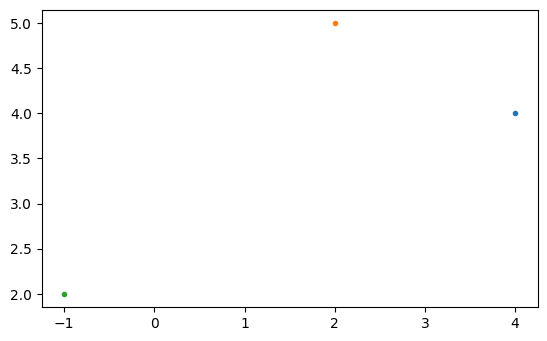

In [14]:
from math import sqrt
import pylab
from typing import Self


class Point:
    def __init__(self, x: float, y: float) -> None:
        self.x = x
        self.y = y

    def __repr__(self) -> str:
        return f"P({self.x}, {self.y})"

    def __eq__(self, other: Self) -> bool:
        return self.x == other.x and self.y == other.y

    def distance(self, p: Self) -> float:
        return sqrt((self.x - p.x) ** 2 + (self.y - p.y) ** 2)

    def milieu(self, p: Self) -> Self:
        return Point((self.x + p.x) / 2, (self.y + p.y) / 2)

    def dessiner(self) -> None:
        pylab.plot(self.x, self.y, ".")


p1 = Point(4, 4)
p1.dessiner()
p2 = Point(2, 5)
p2.dessiner()
p3 = Point(-1, 2)
p3.dessiner()

pylab.axis("scaled")
pylab.show()

7. De même que pour le point, on peut définir un vecteur par ses 2 coordonnées dans le repère R. Ecrire une classe `Vecteur`.


In [15]:
class Vecteur:
    def __init__(self, x: float, y: float) -> None:
        self.x = x
        self.y = y

8. Et pour en tracer un représentant dans le plan, on utilise la fonction `pylab.quiver`:

```python
pylab.quiver(x0, y0, x, y, units='xy', scale=1)
```

Implémenter une méthode dessiner, admettant un seul paramètre `p` (en plus de l’objet lui même bien sûr) de type `Point` et permettant d’afficher un représentant de ce vecteur au point `p`.

Ainsi, si on rajoute les commandes suivantes aux précédentes :

```python
v1 = Vecteur(1,2)
v1.dessiner(p3)

v2 = Vecteur(-3,-1)
v2.dessiner(p1)
v2.dessiner(p2)
```

On doit voir apparaitre :

![](troisfleches.png)


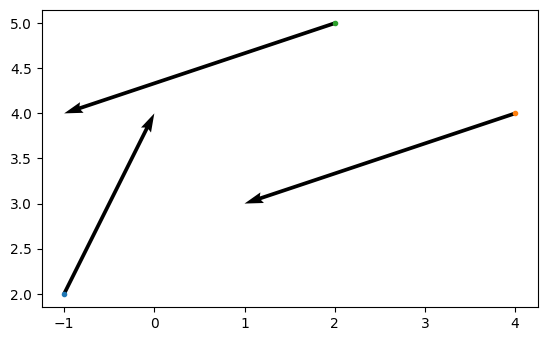

In [16]:
import pylab


class Vecteur:
    def __init__(self, x: float, y: float) -> None:
        self.x = x
        self.y = y

    def dessiner(self, p: Point) -> None:
        p.dessiner()
        pylab.quiver(p.x, p.y, self.x, self.y, units="xy", scale=1)


v1 = Vecteur(1, 2)
v1.dessiner(p3)
v2 = Vecteur(-3, -1)
v2.dessiner(p1)
v2.dessiner(p2)

pylab.axis("scaled")
pylab.show()

9. Parmi les noms de méthodes spéciales, il en existe une permettant d’utiliser le symbole « + » pour faire une « somme » de deux objets, de mêmes types ou pas : la méthode `__add__()`.

Écrire la méthode `__add__`, acceptant comme argument (en plus du vecteur lui-même, `self`) un autre vecteur `v`, et en renvoyant le vecteur somme.

Le résultat doit permettre de faire ça (après avoir implémenté une méthode `__repr__()`comme pour le point) :

```python
>>> u = Vecteur(1, 5)
>>> v = Vecteur(1, 4)
>>> u + v
v(2, 9)
```


In [17]:
import pylab
from typing import Self


class Vecteur:
    def __init__(self, x: float, y: float) -> None:
        self.x = x
        self.y = y

    def __repr__(self) -> str:
        return f"v({self.x}, {self.y})"

    def __add__(self, v: Self) -> Self:
        return Vecteur(self.x + v.x, self.y + v.y)

    def dessiner(self, p: Point) -> None:
        p.dessiner()
        pylab.quiver(p.x, p.y, self.x, self.y, units="xy", scale=1)


u = Vecteur(1, 5)
v = Vecteur(1, 4)
print(u + v)

v(2, 9)


10. On considère une classe Droite disposant des attributs suivants:

- p1 : un attribut public de type Point
- p2 : un attribut public de type Point

Créer une méthode `coeff_dir() -> float` qui renvoie en sortie un float : le coefficient directeur a de la droite :

$a = \frac{y_b - y_a}{x_b - x_a}$


In [ ]:
class Droite:
    def __init__(self, p1: Point, p2: Point) -> None:
        self.p1 = p1
        self.p2 = p2

    def coeff_dir(self) -> float:
        return (self.p2.y - self.p1.y) / (self.p2.x - self.p1.x)

11. Créer une méthode `parallele(d1:Droite, d2:Droite)->bool` qui accepte en argument d'entrée deux droites d1 et d2, et renvoie en sortie si elles sont parallèles (True), ou pas (False)

Créer une méthode `secantes(d1:Droite, d2:Droite)->bool` qui accepte en argument d'entrée deux droites d1 et d2, et renvoie en sortie si elles sont sécantes (True), ou pas (False)


In [ ]:
from typing import Self


class Droite:
    def __init__(self, p1: Point, p2: Point) -> None:
        self.p1 = p1
        self.p2 = p2

    def coeff_dir(self) -> float:
        return (self.p2.y - self.p1.y) / (self.p2.x - self.p1.x)

    @classmethod
    def parallele(cls, d1: Self, d2: Self) -> bool:
        return d1.coeff_dir() == d2.coeff_dir()

    @classmethod
    def secantes(cls, d1: Self, d2: Self) -> bool:
        return not Droite.parallele(d1, d2)

12. Soit (AB) la droite passant par les points A (xA, yA) et B (xB, yB).

Ecrire une méthode `equation_reduite()` qui renvoie les deux coefficients a et b de l'équation réduite y=ax+b, donnés par les deux formules suivantes :

$a = \frac{y_b - y_a}{x_b - x_a}$

et

$b = \frac{x_b y_a - x_a y_b}{x_b - x_a}$

Ecrire une méthode `affiche_equation_reduite()` qui renvoie une chaîne de caractères affichant l'équation réduite de la droite y=ax+b de l'instance courante.


In [ ]:
from typing import Self


class Droite:
    def __init__(self, p1: Point, p2: Point) -> None:
        self.p1 = p1
        self.p2 = p2

    def coeff_dir(self) -> float:
        return (self.p2.y - self.p1.y) / (self.p2.x - self.p1.x)

    @classmethod
    def parallele(cls, d1: Self, d2: Self) -> bool:
        return d1.coeff_dir() == d2.coeff_dir()

    @classmethod
    def secantes(cls, d1: Self, d2: Self) -> bool:
        return not Droite.parallele(d1, d2)

    def equation_reduite(self) -> tuple[float, float]:
        return (
            self.coeff_dir(),
            (self.p2.x * self.p1.y - self.p1.x * self.p2.y) / (self.p2.x - self.p1.x),
        )

13. Créer une méthode `passe_par(p: Point) -> bool` qui renvoie un booléen: `True` si l'instance courante de la droite passe par le point p (les coordonnées du point p vérifient l'équation de la droite), `False` sinon.


In [ ]:
from typing import Self


class Droite:
    def __init__(self, p1: Point, p2: Point) -> None:
        self.p1 = p1
        self.p2 = p2

    def coeff_dir(self) -> float:
        return (self.p2.y - self.p1.y) / (self.p2.x - self.p1.x)

    @classmethod
    def parallele(cls, d1: Self, d2: Self) -> bool:
        return d1.coeff_dir() == d2.coeff_dir()

    @classmethod
    def secantes(cls, d1: Self, d2: Self) -> bool:
        return not Droite.parallele(d1, d2)

    def equation_reduite(self) -> tuple[float, float]:
        return (
            self.coeff_dir(),
            (self.p2.x * self.p1.y - self.p1.x * self.p2.y) / (self.p2.x - self.p1.x),
        )

    def passe_par(self, p: Point) -> bool:
        a, b = self.equation_reduite()
        return abs(p.y - a * p.x + b) < 1e-10

### Exercice n°9 (Polynômes)

On se donne la classe Poly suivante (à compléter) :

```python
class Poly:
  def __init__(self, ...etc...):
    # ... à compléter ...
```

1. Compléter le constructeur `__init__(self, p=None)` de sorte que: il reçoive en entrée un argument `p` sous forme d'une liste Python. Nous modéliserons les polynômes donnés en entrée pour instancier un objet de la classe `Poly`, par une logique inspirée des exemples suivants :

- `[5]`: $5x^0 = 5$ (dans ce cas, le degré du polynôme vaut 0)
- `[3,5]`: $3x^1+5x^0 = 3x+5$ (dans ce cas, le degré du polynôme vaut 1)
- `[2,3,5]`: $2x^2+3x^1+5x^0 = 2x^2+3x+5$ (dans ce cas, le degré du polynôme vaut 2)
- `[4,2,3,5]`: $4x^3+2x^2+3x^1+5x^0 = 4x^3+2x^2+3x+5$ (dans ce cas, le degré du polynôme vaut 3)
  etc..

Créer un attribut public d'instance, `coeffs` qui contient la liste des coefficients `[a_n,..,a_2,a_1,a_0]` modélisant le polynôme $a_n x^n + \dots + a_2 x^2 + a_1 x + a_0$.


In [6]:
class Poly:
    def __init__(self, p: list[float] | None = None) -> None:
        self.coeffs: list[float] = [0] if p is None else p

2. Créer une méthode magique `__repr__()` qui représente le polynôme de l'instance courante self dans un Terminal, sous la forme `a_n x^n + ...+ a_2 x^2 + a_1 x + a_0` où $a_n$, ... , $a_2$, $a_1$, $a_0$ désignent les coefficients du polynôme.

On pourra améliorer l'affichage dans Terminal en affichant, par exemple : $7x^2-3x+5$ plutôt que $7x^2+-3x+5$.


In [13]:
class Poly:
    def __init__(self, p: list[float] | None = None) -> None:
        self.coeffs: list[float] = [0] if p is None else p

    def __repr__(self) -> str:
        res = ""
        deg = len(self.coeffs) - 1
        for i, p in enumerate(self.coeffs):
            if p == 0:
                pass
            elif p == 1:
                res += f"+{1 if i == deg else ''}{'x' if i < deg else ''}{f'^{str(deg - i)}' if i < deg - 1 else ''}"
            elif p > 0:
                res += f"+{p}{'x' if i < deg else ''}{f'^{str(deg - i)}' if i < deg - 1 else ''}"
            else:
                res += f"{p}{'x' if i < deg else ''}{f'^{str(deg - i)}' if i < deg - 1 else ''}"
        if res == "":
            return "0"
        elif res[0] == "+":
            return res[1:]
        else:
            return res


p = Poly([1, 2, 3, 4])
print(p)
p2 = Poly([7, -3, 5])
print(p2)

x^3+2x^2+3x+4
7x^2-3x+5


3. Créer une méthode `degre()` qui renvoie le degré de l'instance courante self


In [9]:
class Poly:
    def __init__(self, p: list[float] | None = None) -> None:
        self.coeffs: list[float] = [0] if p is None else p

    def __repr__(self) -> str:
        res = ""
        deg = len(self.coeffs) - 1
        for i, p in enumerate(self.coeffs):
            if p == 0:
                pass
            elif p == 1:
                res += f"+{1 if i == deg else ''}{'x' if i < deg else ''}{f'^{str(deg - i)}' if i < deg - 1 else ''}"
            elif p > 0:
                res += f"+{p}{'x' if i < deg else ''}{f'^{str(deg - i)}' if i < deg - 1 else ''}"
            else:
                res += f"{p}{'x' if i < deg else ''}{f'^{str(deg - i)}' if i < deg - 1 else ''}"
        if res == "":
            return "0"
        elif res[0] == "+":
            return res[1:]
        else:
            return res

    @property
    def degre(self) -> int:
        return len(self.coeffs) - 1

4. Créer une méthode `coeff(n: int) -> float` telle que:

- elle reçoit en entrée un entier `n`
- elle renvoie en sortie : le coefficient `a_n` correspondant au monôme $x^n$, lorsque ce monôme existe dans le polynôme, ou bien, $0$ lorsque ce monôme n'existe pas dans le polynôme


In [11]:
class Poly:
    def __init__(self, p: list[float] | None = None) -> None:
        self.coeffs: list[float] = [0] if p is None else p

    def __repr__(self) -> str:
        res = ""
        deg = len(self.coeffs) - 1
        for i, p in enumerate(self.coeffs):
            if p == 0:
                pass
            elif p == 1:
                res += f"+{1 if i == deg else ''}{'x' if i < deg else ''}{f'^{str(deg - i)}' if i < deg - 1 else ''}"
            elif p > 0:
                res += f"+{p}{'x' if i < deg else ''}{f'^{str(deg - i)}' if i < deg - 1 else ''}"
            else:
                res += f"{p}{'x' if i < deg else ''}{f'^{str(deg - i)}' if i < deg - 1 else ''}"
        if res == "":
            return "0"
        elif res[0] == "+":
            return res[1:]
        else:
            return res

    @property
    def degre(self) -> int:
        return len(self.coeffs) - 1

    def coeff(self, n: int) -> float:
        return self.coeffs[self.degre - n] if n <= self.degre else 0


p2 = Poly([7, -3, 5])
print(p2.coeff(2))
print(p2.coeff(1))

7
-3


5. Créer une méthode publique `oppose()` qui renvoie le polynôme opposé du polynôme de l'instance courante `self`. Le polynôme opposé est le polynôme dont chaque coefficient a été transformé en son opposé (l'opposé d'un coefficent $a_n$ est $-a_n$)


In [14]:
from typing import Self


class Poly:
    def __init__(self, p: list[float] | None = None) -> None:
        self.coeffs: list[float] = [0] if p is None else p

    def __repr__(self) -> str:
        res = ""
        deg = len(self.coeffs) - 1
        for i, p in enumerate(self.coeffs):
            if p == 0:
                pass
            elif p == 1:
                res += f"+{1 if i == deg else ''}{'x' if i < deg else ''}{f'^{str(deg - i)}' if i < deg - 1 else ''}"
            elif p > 0:
                res += f"+{p}{'x' if i < deg else ''}{f'^{str(deg - i)}' if i < deg - 1 else ''}"
            else:
                res += f"{p}{'x' if i < deg else ''}{f'^{str(deg - i)}' if i < deg - 1 else ''}"
        if res == "":
            return "0"
        elif res[0] == "+":
            return res[1:]
        else:
            return res

    @property
    def degre(self) -> int:
        return len(self.coeffs) - 1

    def coeff(self, n: int) -> float:
        return self.coeffs[self.degre - n] if n <= self.degre else 0

    def oppose(self) -> Self:
        return Poly([-1 * coeff for coeff in self.coeffs])


p2 = Poly([7, -3, 5])
p3 = p2.oppose()
print(p3)

-7x^2+3x-5


6. Créer une méthode magique `__eq__()` qui teste l'égalité de deux polynômes : rappelons que deux polynômes sont égaux si et seulement si:

- leur degré est le même
- tous leurs coefficents sont égaux deux à deux (pour les monômes correspondants)

Cette méthode renvoie donc un booléen:

- `True` lorsque les deux polynômes sont égaux
- `False` sinon : lorsque les deux polynômes NE sont PAS égaux


In [15]:
from typing import Self


class Poly:
    def __init__(self, p: list[float] | None = None) -> None:
        self.coeffs: list[float] = [0] if p is None else p

    def __repr__(self) -> str:
        res = ""
        deg = len(self.coeffs) - 1
        for i, p in enumerate(self.coeffs):
            if p == 0:
                pass
            elif p == 1:
                res += f"+{1 if i == deg else ''}{'x' if i < deg else ''}{f'^{str(deg - i)}' if i < deg - 1 else ''}"
            elif p > 0:
                res += f"+{p}{'x' if i < deg else ''}{f'^{str(deg - i)}' if i < deg - 1 else ''}"
            else:
                res += f"{p}{'x' if i < deg else ''}{f'^{str(deg - i)}' if i < deg - 1 else ''}"
        if res == "":
            return "0"
        elif res[0] == "+":
            return res[1:]
        else:
            return res

    @property
    def degre(self) -> int:
        return len(self.coeffs) - 1

    def coeff(self, n: int) -> float:
        return self.coeffs[self.degre - n] if n <= self.degre else 0

    def oppose(self) -> Self:
        return Poly([-1 * coeff for coeff in self.coeffs])

    def __eq__(self, other: Self) -> bool:
        return self.coeffs == other.coeffs


p2 = Poly([7, -3, 5])
p3 = Poly([7, -3, 5])
print(p2 == p3)

True


7. Créer une méthode magique `__add__()` qui ajoute deux polynômes. Cette méthode magique renvoie donc un object de classe `Poly`.


In [25]:
from typing import Self


class Poly:
    def __init__(self, p: list[float] | None = None) -> None:
        self.coeffs: list[float] = [0] if p is None else p

    def __repr__(self) -> str:
        res = ""
        deg = len(self.coeffs) - 1
        for i, p in enumerate(self.coeffs):
            if p == 0:
                pass
            elif p == 1:
                res += f"+{1 if i == deg else ''}{'x' if i < deg else ''}{f'^{str(deg - i)}' if i < deg - 1 else ''}"
            elif p > 0:
                res += f"+{p}{'x' if i < deg else ''}{f'^{str(deg - i)}' if i < deg - 1 else ''}"
            else:
                res += f"{p}{'x' if i < deg else ''}{f'^{str(deg - i)}' if i < deg - 1 else ''}"
        if res == "":
            return "0"
        elif res[0] == "+":
            return res[1:]
        else:
            return res

    @property
    def degre(self) -> int:
        return len(self.coeffs) - 1

    def coeff(self, n: int) -> float:
        return self.coeffs[self.degre - n] if n <= self.degre else 0

    def oppose(self) -> Self:
        return Poly([-1 * coeff for coeff in self.coeffs])

    def __eq__(self, other: Self) -> bool:
        return self.coeffs == other.coeffs

    def __add__(self, other: Self) -> Self:
        p = Poly(
            [
                self.coeff(i) + other.coeff(i)
                for i in range(max(self.degre, other.degre), -1, -1)
            ]
        )
        while len(p.coeffs) > 1 and p.coeffs[0] == 0:
            p.coeffs.pop(0)
        return p


p2 = Poly([7, -3, 5])
p3 = Poly([7, -3, 5])
print(p2 + p3)

14x^2-6x+10


8. Créer une méthode magique `__sub__()` qui soustrait deux polynômes. Cette méthode magique renvoie donc un object de classe Poly.


In [26]:
from typing import Self


class Poly:
    def __init__(self, p: list[float] | None = None) -> None:
        self.coeffs: list[float] = [0] if p is None else p

    def __repr__(self) -> str:
        res = ""
        deg = len(self.coeffs) - 1
        for i, p in enumerate(self.coeffs):
            if p == 0:
                pass
            elif p == 1:
                res += f"+{1 if i == deg else ''}{'x' if i < deg else ''}{f'^{str(deg - i)}' if i < deg - 1 else ''}"
            elif p > 0:
                res += f"+{p}{'x' if i < deg else ''}{f'^{str(deg - i)}' if i < deg - 1 else ''}"
            else:
                res += f"{p}{'x' if i < deg else ''}{f'^{str(deg - i)}' if i < deg - 1 else ''}"
        if res == "":
            return "0"
        elif res[0] == "+":
            return res[1:]
        else:
            return res

    @property
    def degre(self) -> int:
        return len(self.coeffs) - 1

    def coeff(self, n: int) -> float:
        return self.coeffs[self.degre - n] if n <= self.degre else 0

    def oppose(self) -> Self:
        return Poly([-1 * coeff for coeff in self.coeffs])

    def __eq__(self, other: Self) -> bool:
        return self.coeffs == other.coeffs

    def __add__(self, other: Self) -> Self:
        p = Poly(
            [
                self.coeff(i) + other.coeff(i)
                for i in range(max(self.degre, other.degre), -1, -1)
            ]
        )
        while len(p.coeffs) > 1 and p.coeffs[0] == 0:
            p.coeffs.pop(0)
        return p

    def __sub__(self, other: Self) -> Self:
        return self + other.oppose()


p2 = Poly([7, -3, 5])
p3 = Poly([7, -3, 5])
p4 = p2 - p3
print(p4)
print(p4.coeffs)

0
[0]


9. Créer une méthode magique `__mul__()` qui multiplie deux polynômes. Cette méthode magique renvoie donc un object de classe Poly.


In [27]:
from typing import Self


class Poly:
    def __init__(self, p: list[float] | None = None) -> None:
        self.coeffs: list[float] = [0] if p is None else p

    def __repr__(self) -> str:
        res = ""
        deg = len(self.coeffs) - 1
        for i, p in enumerate(self.coeffs):
            if p == 0:
                pass
            elif p == 1:
                res += f"+{1 if i == deg else ''}{'x' if i < deg else ''}{f'^{str(deg - i)}' if i < deg - 1 else ''}"
            elif p > 0:
                res += f"+{p}{'x' if i < deg else ''}{f'^{str(deg - i)}' if i < deg - 1 else ''}"
            else:
                res += f"{p}{'x' if i < deg else ''}{f'^{str(deg - i)}' if i < deg - 1 else ''}"
        if res == "":
            return "0"
        elif res[0] == "+":
            return res[1:]
        else:
            return res

    @property
    def degre(self) -> int:
        return len(self.coeffs) - 1

    def coeff(self, n: int) -> float:
        return self.coeffs[self.degre - n] if n <= self.degre else 0

    def oppose(self) -> Self:
        return Poly([-1 * coeff for coeff in self.coeffs])

    def __eq__(self, other: Self) -> bool:
        return self.coeffs == other.coeffs

    def __add__(self, other: Self) -> Self:
        p = Poly(
            [
                self.coeff(i) + other.coeff(i)
                for i in range(max(self.degre, other.degre), -1, -1)
            ]
        )
        while len(p.coeffs) > 1 and p.coeffs[0] == 0:
            p.coeffs.pop(0)
        return p

    def __sub__(self, other: Self) -> Self:
        return self + other.oppose()

    def __mul__(self, other: Self) -> Self:
        res = Poly()
        for i in range(other.degre + 1):
            res += Poly([other.coeff(i) * coeff for coeff in self.coeffs] + [0] * i)
        return res


p2 = Poly([7, -3, 5])
p3 = Poly([7, -3, 5])
print(p2 * p3)

49x^4-42x^3+79x^2-30x+25


10. Créer une méthode magique `__pow__(n: int)` qui calcule le polynôme à la puissance un nombre entier (positif) `n`. Cette méthode magique renvoie donc un object de classe Poly.


In [28]:
from typing import Self


class Poly:
    def __init__(self, p: list[float] | None = None) -> None:
        self.coeffs: list[float] = [0] if p is None else p

    def __repr__(self) -> str:
        res = ""
        deg = len(self.coeffs) - 1
        for i, p in enumerate(self.coeffs):
            if p == 0:
                pass
            elif p == 1:
                res += f"+{1 if i == deg else ''}{'x' if i < deg else ''}{f'^{str(deg - i)}' if i < deg - 1 else ''}"
            elif p > 0:
                res += f"+{p}{'x' if i < deg else ''}{f'^{str(deg - i)}' if i < deg - 1 else ''}"
            else:
                res += f"{p}{'x' if i < deg else ''}{f'^{str(deg - i)}' if i < deg - 1 else ''}"
        if res == "":
            return "0"
        elif res[0] == "+":
            return res[1:]
        else:
            return res

    @property
    def degre(self) -> int:
        return len(self.coeffs) - 1

    def coeff(self, n: int) -> float:
        return self.coeffs[self.degre - n] if n <= self.degre else 0

    def oppose(self) -> Self:
        return Poly([-1 * coeff for coeff in self.coeffs])

    def __eq__(self, other: Self) -> bool:
        return self.coeffs == other.coeffs

    def __add__(self, other: Self) -> Self:
        p = Poly(
            [
                self.coeff(i) + other.coeff(i)
                for i in range(max(self.degre, other.degre), -1, -1)
            ]
        )
        while len(p.coeffs) > 1 and p.coeffs[0] == 0:
            p.coeffs.pop(0)
        return p

    def __sub__(self, other: Self) -> Self:
        return self + other.oppose()

    def __mul__(self, other: Self) -> Self:
        res = Poly()
        for i in range(other.degre + 1):
            res += Poly([other.coeff(i) * coeff for coeff in self.coeffs] + [0] * i)
        return res

    def __pow__(self, n: int) -> Self:
        res = Poly([1])
        for _ in range(n):
            res *= self
        return res


p2 = Poly([7, -3, 5])
print(p2**2)

49x^4-42x^3+79x^2-30x+25


11. On dispose de la propriété suivante pour des polynômes :

> Propriété 1. Vers la division euclidienne polynômiale, un début...
> Soit $A$ et $B$ deux polynômes, avec $B \neq 0$, alors il existe un unique couple $(Q_1, R_1)$ de deux polynômes $Q_1$ et $R_1$ tels que :
>
> - $Q_1$ est un monôme de la forme $aX^n$, avec $deg(Q1) = deg(A) - deg(B)$
> - $A = Q_1 \times B + R_1$, donc $R_1 = A - B \times Q_1$
> - $deg(R_1) < deg(A)$

Créer une méthode `divmodmono(B:Poly) -> tuple(Q1,P1)` telle que:

- elle reçoit en entrée l'instance courante `self` d'un Polynôme $A$ et un Polynôme $B$,
- elle renvoie en sortie le tuple des deux instances $(Q_1, R_1)$ de classe `Poly`, telles que décrites précécemment


In [29]:
from typing import Self


class Poly:
    def __init__(self, p: list[float] | None = None) -> None:
        self.coeffs: list[float] = [0] if p is None else p

    def __repr__(self) -> str:
        res = ""
        deg = len(self.coeffs) - 1
        for i, p in enumerate(self.coeffs):
            if p == 0:
                pass
            elif p == 1:
                res += f"+{1 if i == deg else ''}{'x' if i < deg else ''}{f'^{str(deg - i)}' if i < deg - 1 else ''}"
            elif p > 0:
                res += f"+{p}{'x' if i < deg else ''}{f'^{str(deg - i)}' if i < deg - 1 else ''}"
            else:
                res += f"{p}{'x' if i < deg else ''}{f'^{str(deg - i)}' if i < deg - 1 else ''}"
        if res == "":
            return "0"
        elif res[0] == "+":
            return res[1:]
        else:
            return res

    @property
    def degre(self) -> int:
        return len(self.coeffs) - 1

    def coeff(self, n: int) -> float:
        return self.coeffs[self.degre - n] if n <= self.degre else 0

    def oppose(self) -> Self:
        return Poly([-1 * coeff for coeff in self.coeffs])

    def __eq__(self, other: Self) -> bool:
        return self.coeffs == other.coeffs

    def __add__(self, other: Self) -> Self:
        p = Poly(
            [
                self.coeff(i) + other.coeff(i)
                for i in range(max(self.degre, other.degre), -1, -1)
            ]
        )
        while len(p.coeffs) > 1 and p.coeffs[0] == 0:
            p.coeffs.pop(0)
        return p

    def __sub__(self, other: Self) -> Self:
        return self + other.oppose()

    def __mul__(self, other: Self) -> Self:
        res = Poly()
        for i in range(other.degre + 1):
            res += Poly([other.coeff(i) * coeff for coeff in self.coeffs] + [0] * i)
        return res

    def __pow__(self, n: int) -> Self:
        res = Poly([1])
        for _ in range(n):
            res *= self
        return res

    def divmodmono(self, B: Self) -> tuple[Self, Self]:
        if self.degre < B.degre:
            return (Poly(), B)
        q1 = Poly([(self.coeffs[0] / B.coeffs[0])] + [0] * (self.degre - B.degre))
        r1 = self - q1 * B
        return (q1, r1)


a = Poly([1, -1, -1, 3, -2, 0])
b = Poly([1, -1, 1])
print(a.divmodmono(b))

(x^3, -2.0x^3+3x^2-2x)


12. Division Euclidienne Polynômiale

> La Division Euclidienne Polynômiale d'un Polynôme $A$ par un Polynôme $B$, avec $B \neq 0$, quelquefois appelée plus simplement Division Polynômiale de $A$ par $B$, est une opération arithmétique algorithmique généralisant la division euclienne dans le cas des polynômes. La division polynômiale de $A$ par $B$ détermine de manière unique un couple de deux polynômes ($Q$, $R$) tel que :
>
> - $A = BQ + R$
> - $0 \leq deg(R) < deg(B)$

Créer une méthode magique `__divmod__(B:Poly)->tuple(Q:Poly, R:Poly)` telle que:

- elle reçoit en entrée l'instance courante self du Polynôme $A$ et un Polynôme $B$
- elle renvoie en sortie un tuple constitué du quotient $Q$ (=un polynôme) et du reste $R$ (=un polynôme) de la division euclidienne polynômiale de $A$ par $B$.

Cette méthode magique renvoie donc un tuple de deux objets de classe Poly.


In [35]:
from typing import Self


class Poly:
    def __init__(self, p: list[float] | None = None) -> None:
        self.coeffs: list[float] = [0] if p is None else p

    def __repr__(self) -> str:
        res = ""
        deg = len(self.coeffs) - 1
        for i, p in enumerate(self.coeffs):
            if p == 0:
                pass
            elif p == 1:
                res += f"+{1 if i == deg else ''}{'x' if i < deg else ''}{f'^{str(deg - i)}' if i < deg - 1 else ''}"
            elif p > 0:
                res += f"+{p}{'x' if i < deg else ''}{f'^{str(deg - i)}' if i < deg - 1 else ''}"
            else:
                res += f"{p}{'x' if i < deg else ''}{f'^{str(deg - i)}' if i < deg - 1 else ''}"
        if res == "":
            return "0"
        elif res[0] == "+":
            return res[1:]
        else:
            return res

    @property
    def degre(self) -> int:
        return len(self.coeffs) - 1

    def coeff(self, n: int) -> float:
        return self.coeffs[self.degre - n] if n <= self.degre else 0

    def oppose(self) -> Self:
        return Poly([-1 * coeff for coeff in self.coeffs])

    def __eq__(self, other: Self) -> bool:
        return self.coeffs == other.coeffs

    def __add__(self, other: Self) -> Self:
        p = Poly(
            [
                self.coeff(i) + other.coeff(i)
                for i in range(max(self.degre, other.degre), -1, -1)
            ]
        )
        while len(p.coeffs) > 1 and p.coeffs[0] == 0:
            p.coeffs.pop(0)
        return p

    def __sub__(self, other: Self) -> Self:
        return self + other.oppose()

    def __mul__(self, other: Self) -> Self:
        res = Poly()
        for i in range(other.degre + 1):
            res += Poly([other.coeff(i) * coeff for coeff in self.coeffs] + [0] * i)
        return res

    def __pow__(self, n: int) -> Self:
        res = Poly([1])
        for _ in range(n):
            res *= self
        return res

    def divmodmono(self, B: Self) -> tuple[Self, Self]:
        if self.degre < B.degre:
            return (Poly(), B)
        q1 = Poly([(self.coeffs[0] / B.coeffs[0])] + [0] * (self.degre - B.degre))
        r1 = self - q1 * B
        return (q1, r1)

    def __divmod__(self, B: Self) -> tuple[Self, Self]:
        q, r = self.divmodmono(B)
        while r.degre >= B.degre:
            q2, r = r.divmodmono(B)
            q += q2
        return (q, r)


a = Poly([1, -1, -1, 3, -2, 0])
b = Poly([1, -1, 1])
q, r = a.__divmod__(b)
print(q, r)

x^3-2.0x+1 x-1.0


13. En déduire une méthode magique `__floordiv__()` qui renvoie (uniquement) le quotient (=un polynôme) de la division euclidienne entre deux polynômes. Cette méthode magique renvoie donc un objet de classe Poly.

En déduire une méthode magique `__mod__()` qui renvoie (uniquement) le reste (=un polynôme) de la division euclidienne entre deux polynômes. Cette méthode magique renvoie donc un objet de classe Poly.


In [36]:
from typing import Self


class Poly:
    def __init__(self, p: list[float] | None = None) -> None:
        self.coeffs: list[float] = [0] if p is None else p

    def __repr__(self) -> str:
        res = ""
        deg = len(self.coeffs) - 1
        for i, p in enumerate(self.coeffs):
            if p == 0:
                pass
            elif p == 1:
                res += f"+{1 if i == deg else ''}{'x' if i < deg else ''}{f'^{str(deg - i)}' if i < deg - 1 else ''}"
            elif p > 0:
                res += f"+{p}{'x' if i < deg else ''}{f'^{str(deg - i)}' if i < deg - 1 else ''}"
            else:
                res += f"{p}{'x' if i < deg else ''}{f'^{str(deg - i)}' if i < deg - 1 else ''}"
        if res == "":
            return "0"
        elif res[0] == "+":
            return res[1:]
        else:
            return res

    @property
    def degre(self) -> int:
        return len(self.coeffs) - 1

    def coeff(self, n: int) -> float:
        return self.coeffs[self.degre - n] if n <= self.degre else 0

    def oppose(self) -> Self:
        return Poly([-1 * coeff for coeff in self.coeffs])

    def __eq__(self, other: Self) -> bool:
        return self.coeffs == other.coeffs

    def __add__(self, other: Self) -> Self:
        p = Poly(
            [
                self.coeff(i) + other.coeff(i)
                for i in range(max(self.degre, other.degre), -1, -1)
            ]
        )
        while len(p.coeffs) > 1 and p.coeffs[0] == 0:
            p.coeffs.pop(0)
        return p

    def __sub__(self, other: Self) -> Self:
        return self + other.oppose()

    def __mul__(self, other: Self) -> Self:
        res = Poly()
        for i in range(other.degre + 1):
            res += Poly([other.coeff(i) * coeff for coeff in self.coeffs] + [0] * i)
        return res

    def __pow__(self, n: int) -> Self:
        res = Poly([1])
        for _ in range(n):
            res *= self
        return res

    def divmodmono(self, B: Self) -> tuple[Self, Self]:
        if self.degre < B.degre:
            return (Poly(), B)
        q1 = Poly([(self.coeffs[0] / B.coeffs[0])] + [0] * (self.degre - B.degre))
        r1 = self - q1 * B
        return (q1, r1)

    def __divmod__(self, B: Self) -> tuple[Self, Self]:
        q, r = self.divmodmono(B)
        while r.degre >= B.degre:
            q2, r = r.divmodmono(B)
            q += q2
        return (q, r)

    def __floordiv__(self, B: Self) -> Self:
        return self.__divmod__(B)[0]

    def __mod__(self, B: Self) -> Self:
        return self.__divmod__(B)[1]


a = Poly([1, -1, -1, 3, -2, 0])
b = Poly([1, -1, 1])
print(a // b)
print(a % b)

x^3-2.0x+1
x-1.0
